In [1]:
import pandas as pd

# Read the data

In [2]:
df = pd.read_csv('C:/Users/HP/Downloads/news/news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

# We want our system to identify the fake news by the title itself.

In [5]:
df = df.drop(['text','Unnamed: 0'], axis =1)


In [6]:
df.shape

(6335, 2)

In [7]:
df.dropna()

,title,label
0,You Can Smell Hillary’s Fear,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,Kerry to go to Paris in gesture of sympathy,REAL
3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,The Battle of New York: Why This Primary Matters,REAL
...,...,...
6330,State Department says it can't find emails fro...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...",REAL


In [8]:
target = [1 if i == 'FAKE' else 0 for i in df['label']]
df['label'] = target

In [10]:
X = df[['title']]
Y = df[['label']]

In [11]:
messages = df.copy()

# PREPERATION OF THE DATA 

In [13]:
#TO DO THE CLEANING PART OF THE TEXT.

import regex as re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i]) #replace every word except[a-zA-Z] with ' '
    review = review.lower() #converts upper cases to lower cases
    review = review.split() #splits strings to string(['iam'] goes to ['i', 'am']) arrays by the white space seperation, commas.
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #to count did do done as one thing
    review = ' '.join(review) #join again those white spaces and commas, to form a single sentence
    corpus.append(review)

# TO VECTORIZE THE TITLE 

In [14]:
# Countvectorizer
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [15]:
X.shape

(6335, 5000)

# TEST TRAIN SPLIT

In [16]:
## Divide the dataset into Train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [17]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

C:\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
import matplotlib.pyplot as plt

# FUNCTION FOR CONFUSION MATRIX

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MULTINOMIAL NAIVE BAYES 

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [21]:
from sklearn import metrics
import numpy as np
import itertools

C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy:   0.818
Confusion matrix, without normalization


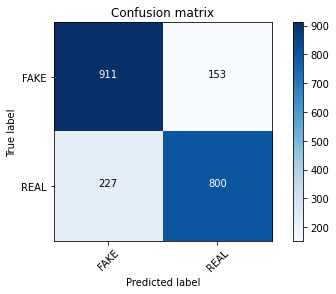

In [22]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# SCORE

In [23]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8182687709230033